In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
data_path = 'data/sensor_metrics.csv'
df = pd.read_csv(data_path)
df.head()

,Unnamed: 0,date,field,value,device_id
0,0,2022-05-23 05:21:20.242008+00:00,battery_voltage,14.99837,SB1001
1,1,2022-05-23 05:21:51.183225+00:00,battery_voltage,14.99837,SB1001
2,2,2022-05-23 05:22:22.381353+00:00,battery_voltage,14.99837,SB1001
3,3,2022-05-23 05:22:52.605236+00:00,battery_voltage,14.99837,SB1001
4,4,2022-05-23 05:23:22.870146+00:00,battery_voltage,14.99837,SB1001


In [56]:
newdb_level=df[df.field == "db_level"]
sensors=newdb_level['device_id'].value_counts()
sensors

SB1007    88566
SB1005    18242
SB1012    14821
SB1001     7768
SB1006     3794
SB1002     2542
SB1013      686
SB1008       45
Name: device_id, dtype: int64

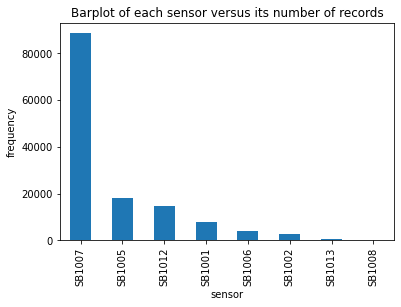

In [57]:
fig,ax = plt.subplots()
sensors.plot(ax = ax, kind = 'bar', ylabel = 'frequency',xlabel='sensor')
plt.title('Barplot of each sensor versus its number of records')
plt.show()

<AxesSubplot:xlabel='date', ylabel='value'>

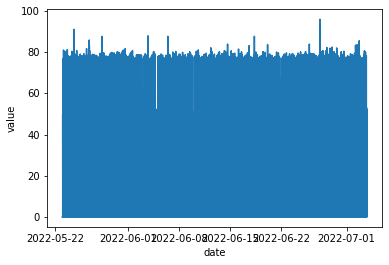

In [58]:

#sns.lineplot(data=newdb_level, x="time", y="value",hue="device_id")
import datetime
newdb_level = newdb_level.set_index('date')
newdb_level.index =pd.to_datetime(newdb_level.index)

def __lineplot(deviceid):
    new_dfdevice_id = newdb_level[newdb_level['device_id'] == deviceid]
    return new_dfdevice_id


SB1007=__lineplot('SB1007')
sns.lineplot(data=SB1007, x="date", y="value")

<AxesSubplot:xlabel='date', ylabel='value'>

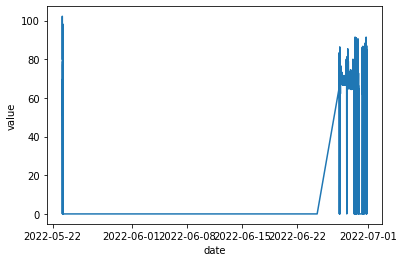

In [59]:
SB1001=__lineplot('SB1001')
sns.lineplot(data=SB1001, x="date", y="value")

<AxesSubplot:xlabel='date', ylabel='value'>

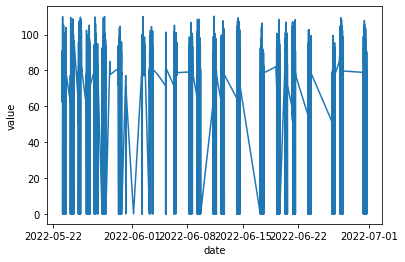

In [60]:
SB1005=__lineplot('SB1005')
sns.lineplot(data=SB1005, x="date", y="value")

<AxesSubplot:xlabel='date', ylabel='value'>

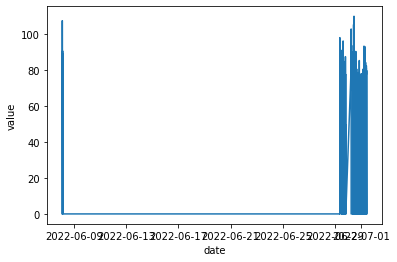

In [61]:
SB1002=__lineplot('SB1002')
sns.lineplot(data=SB1002, x="date", y="value")

<AxesSubplot:xlabel='date', ylabel='value'>

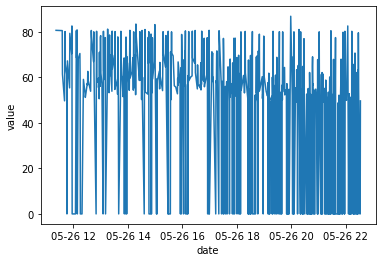

In [62]:
SB10013=__lineplot('SB1013')
sns.lineplot(data=SB10013, x="date", y="value")

<AxesSubplot:xlabel='date', ylabel='value'>

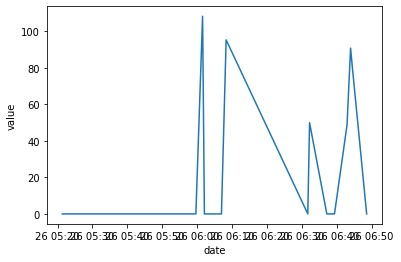

In [63]:
SB1008=__lineplot('SB1008')
sns.lineplot(data=SB1008, x="date", y="value")

<AxesSubplot:xlabel='date', ylabel='value'>

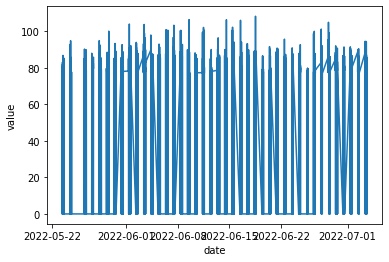

In [64]:
SB10012 =__lineplot('SB1012')
sns.lineplot(data=SB10012, x="date", y="value")

<AxesSubplot:xlabel='date', ylabel='value'>

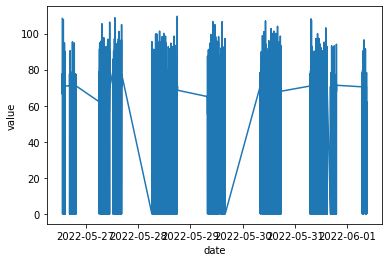

In [65]:
SB1006=__lineplot('SB1006')
sns.lineplot(data=SB1006, x="date", y="value")

In [66]:
daytime = newdb_level.between_time('6:00','22:00')
time_6_22 = daytime['device_id'].value_counts()
time_6_22

SB1007    55052
SB1005    16984
SB1012    14821
SB1001     5067
SB1006     3794
SB1002     1802
SB1013      643
SB1008       17
Name: device_id, dtype: int64

In [67]:
nighttime = newdb_level.between_time('22:00','6:00')
time_22_6 = nighttime['device_id'].value_counts()
time_22_6

SB1007    33514
SB1001     2701
SB1005     1258
SB1002      740
SB1013       43
SB1008       28
Name: device_id, dtype: int64

In [68]:
def day_night_records(id):
    daytime = id.between_time('6:00','22:00')
    nighttime = id.between_time('22:00','6:00')
    return daytime, nighttime


In [69]:
def exceedances(new_df, limit):
    return len(new_df[new_df['value'] >= limit])

In [70]:
def records(sensor_name, data, day_limit, night_limit):
    day, night = day_night_records(data)
    day_exc = exceedances(day, day_limit)  
    day_percent = 0 if len(day) == 0 else (day_exc/len(day)) * 100
    night_exc = exceedances(night, night_limit)
    night_percent = 0 if len(night) == 0 else (night_exc/len(night)) * 100
    return [sensor_name, len(data), len(day), day_exc, day_percent, len(night), night_exc, night_percent]


In [71]:

sensors = [('SB1005', SB1005, 60, 50), ('SB1006', SB1006, 60, 50), ('SB1007', SB1007, 55, 45),('SB1002', SB1002, 55, 45) ,
           ('SB1001', SB1001, 55, 45),('SB1008', SB1008, 55, 45), ('SB1012', SB10012, 55, 45), ('SB1013', SB10013, 60, 50)]
newdf = [records(name, sensor_data, dl, nl) for name, sensor_data, dl, nl in sensors]
sensor_df = pd.DataFrame.from_records(newdf, columns=["Sensor", "Total records", "Total Daytime Records", "Daytime Exceedances", "Daytime Exceedance Percentage", "Total Night Records", "Nighttime Exceedances", "Nighttime Exceedance Percentage"])
sensor_df = sensor_df.set_index('Sensor')
sensor_df


,Total records,Total Daytime Records,Daytime Exceedances,Daytime Exceedance Percentage,Total Night Records,Nighttime Exceedances,Nighttime Exceedance Percentage
Sensor,,,,,,,
SB1005,18242,16984,14123,83.154734,1258,1150,91.414944
SB1006,3794,3794,2924,77.069056,0,0,0.000000
SB1007,88566,55052,2404,4.366780,33514,1206,3.598496
SB1002,2542,1802,555,30.799112,740,93,12.567568
SB1001,7768,5067,4492,88.652062,2701,1729,64.013328
SB1008,45,17,4,23.529412,28,0,0.000000
SB1012,14821,14821,5530,37.311922,0,0,0.000000
SB1013,686,643,200,31.104199,43,18,41.860465
